# Start of program

In [1]:
from functions import *
#from get_field import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

platform = plt.imread('platform1.png')

Input:

In [2]:
# Code should run for how many loops:
run_time = 500
# Between how many ped should be added per timestamp
ped_add_min = 1
ped_add_max = 2

In [ ]:
ped_list = []
plotting_list = []

df = pd.DataFrame(columns = ['timestamp', 'ped', 'x', 'y'])
#df.set_index(['timestamp', 'ped'], inplace=True)
df

In [ ]:
for t in range(0, run_time):
    try:
        ped_list = generate_ped(ped_list, ped_add_min, ped_add_max)
        if t == 0:
            first = ped_list.copy()
        if t == int(run_time/2):
            half_way = ped_list.copy()
        field_list = get_field(ped_list)
        for ped in range(0, len(ped_list)):
            df = df.append({'timestamp' : t, 'ped': ped, 'x' : ped_list[ped][1][0], 'y' : ped_list[ped][1][1]}, ignore_index=True)
            probabilities = get_prob(ped_list, ped, field_list)
            decided_square = make_decision(probabilities)
            move_ped(ped_list, ped, decided_square)
        print(t)
            
    except:
        pass
        

In [5]:
unique_ped = np.unique(df.ped)
unique_ped


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype=object)

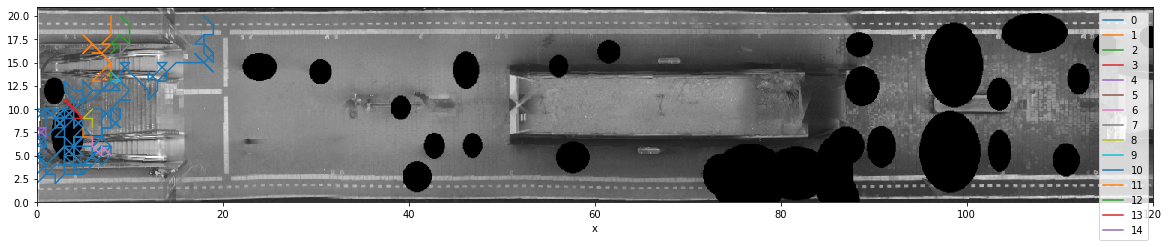

In [6]:
# plot a fugure:
fig = plt.figure(figsize = (20,10))
#plot axes
ax  = fig.add_subplot(111)
ax.imshow(platform, extent=[0,120, 0,21])

for i in unique_ped:
  df.query('ped == @i').plot('x', 'y', ax=ax, label=str(i))

TypeError: no numeric data to plot

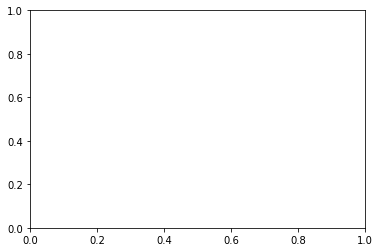

In [7]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df.query('ped == 18').plot('x', 'y', ax=ax, label=str(i))

In [ ]:
fig, ax = plt.subplots(4, figsize = (10,10))
array_first = np.array(first)
array_halfway = np.array(half_way)
array_end = np.array(ped_list)

ax[0].set_title('start')
ax[0].scatter(x=array_first[:,1,0], y=array_first[:,1,1])

ax[1].set_title('halfway')
ax[1].scatter(x=array_halfway[:,1,0], y=array_halfway[:,1,1])

ax[2].set_title('End position')
ax[2].scatter(x=array_end[:,1,0], y=array_end[:,1,1])

ax[3].set_title('goal')
ax[3].scatter(x=array_end[:,0,0], y=array_end[:,0,1])

In [ ]:
H, xedges, yedges = np.histogram2d(array_end[:,1,0], array_end[:,1,1], bins=(120))
H = H.T
platform = plt.imread('platform1.png')

fig = plt.figure(frameon=False)#figsize=(22, 3))

platform = plt.imshow(platform, extent=[0,120, 0,21])
density = plt.imshow(H, cmap = 'Blues', norm = LogNorm(),  extent=[0,120, 0,21])
plt.show()
#ax.imshow(H, norm = LogNorm())

In [ ]:
ax.imshow(platform, extent=[0,120, 0,21])
plt.hist2d(array_end[:,1,0], array_end[:,1,1], bins=10, ax=ax);


In [ ]:
img = plt.imread('platform.png')
fig, ax = plt.subplots()
ax.imshow(img)